### This is a simple notebook to infer the parameters of a straight line model.

It accompanies Chapter 1 of the book.

Author: Viviana Acquaviva

License: TBD

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
#matplotlib.rcParams.update({'figure.autolayout': False})
#matplotlib.rcParams['figure.dpi'] = 300

In [8]:
np.random.seed(16) #why are we fixing the seed?

x = np.arange(10) 

y = 2*x + 5 + np.random.randn(10) #generate some data with random gaussian scatter

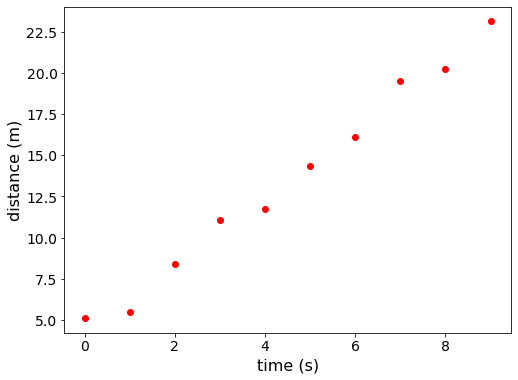

In [9]:
plt.figure(figsize=(8,6)) #
plt.scatter(x,y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)');

In [10]:
print(np.round(y,1)) #all the points

[ 5.1  5.5  8.4 11.1 11.8 14.4 16.1 19.5 20.2 23.1]


In [11]:
y = np.round(y,1) #match the book

Let's generate a bunch of slopes and intercepts. Maybe 100 of each.

In [12]:
slopes = np.linspace(1,3,101)

intercepts = np.linspace(4,6,101)

In [13]:
slopes #just checking

array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
       1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
       1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
       1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
       1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  , 2.02, 2.04, 2.06, 2.08,
       2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 ,
       2.32, 2.34, 2.36, 2.38, 2.4 , 2.42, 2.44, 2.46, 2.48, 2.5 , 2.52,
       2.54, 2.56, 2.58, 2.6 , 2.62, 2.64, 2.66, 2.68, 2.7 , 2.72, 2.74,
       2.76, 2.78, 2.8 , 2.82, 2.84, 2.86, 2.88, 2.9 , 2.92, 2.94, 2.96,
       2.98, 3.  ])

In [14]:
intercepts

array([4.  , 4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16, 4.18, 4.2 ,
       4.22, 4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38, 4.4 , 4.42,
       4.44, 4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 , 4.62, 4.64,
       4.66, 4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82, 4.84, 4.86,
       4.88, 4.9 , 4.92, 4.94, 4.96, 4.98, 5.  , 5.02, 5.04, 5.06, 5.08,
       5.1 , 5.12, 5.14, 5.16, 5.18, 5.2 , 5.22, 5.24, 5.26, 5.28, 5.3 ,
       5.32, 5.34, 5.36, 5.38, 5.4 , 5.42, 5.44, 5.46, 5.48, 5.5 , 5.52,
       5.54, 5.56, 5.58, 5.6 , 5.62, 5.64, 5.66, 5.68, 5.7 , 5.72, 5.74,
       5.76, 5.78, 5.8 , 5.82, 5.84, 5.86, 5.88, 5.9 , 5.92, 5.94, 5.96,
       5.98, 6.  ])

#### Note: these are already > 10000 models (curse of dimensionality!)

For convenience, we can define two functions that describe our model (a straight line) and the squared error function:

In [15]:
def model(x,m,b):
    return m*x + b

def se(m,b,x,yobs):
    return np.sum((yobs - model(x,m,b))**2)

We can calculate the squared error for each value:

In [16]:
square_errs = np.zeros((101,101))

In [17]:
for i, m in enumerate(slopes):
    for j,b in enumerate(intercepts):
        square_errs[i,j] = se(m,b,x,y)

In [18]:
square_errs = np.array([[se(m,b,x,y) for b in intercepts] for m in slopes]) 

#This generates an array where first index refers to slope and second index refers to intercept

In [19]:
square_errs.shape #check that the array has been built properly

(101, 101)

In [ ]:
square_errs

#### Let's figure out which model is the best fit (lowest Squared Error)

In [21]:
np.argmin(square_errs)

5269

In [22]:
print(square_errs.argmin()) #index of min; however this corresponds to flattened array

indices = np.unravel_index(square_errs.argmin(), square_errs.shape) #indices of minimum value as a (row, col) pair

print(indices)

5269
(52, 17)


In [23]:
#Derive the slope and intercept for best model

bestm, bestb = slopes[indices[0]],intercepts[indices[1]]

In [24]:
bestm, bestb #How do they compare to the original?

(2.04, 4.34)

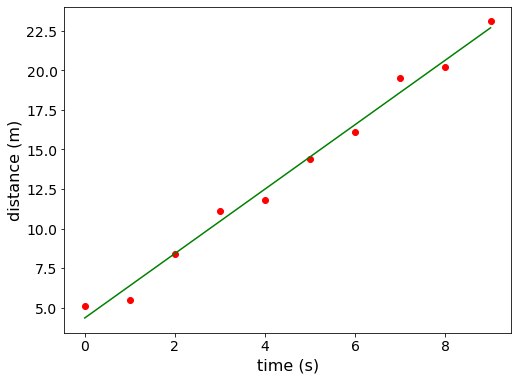

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(x,y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.plot(x, bestm * x + bestb, c = 'g'); #plot the best fit model

What if there are uncertainties?

In [26]:
np.random.seed(10)

dy = np.random.randn(10)*np.sqrt(2) #these are the uncertainties; sign doesn't matter

In [27]:
dy

array([ 1.88314769,  1.01155723, -2.18552605, -0.01185655,  0.87870176,
       -1.01835477,  0.37549009,  0.1535108 ,  0.006069  , -0.24692199])

In [28]:
def se(m,b,x,yobs):
    return np.sum((yobs - model(x,m,b))**2)

def chi2(m,b,x,yobs,err):
    return np.sum(((yobs - model(x,m,b))**2/err**2))

In [29]:
allchi2 = np.array([[chi2(m,b,x,y,dy) for b in intercepts] for m in slopes]) 

In [30]:
print(allchi2.argmin()) #index of min; however this corresponds to flattened array

indices = np.unravel_index(allchi2.argmin(), allchi2.shape) #indices of minimum value as a (row, col) pair

4223


In [31]:
#Derive the slope and intercept for best model

bestm_werr, bestb_werr = slopes[indices[0]],intercepts[indices[1]]

In [32]:
bestm_werr, bestb_werr

(1.82, 5.640000000000001)

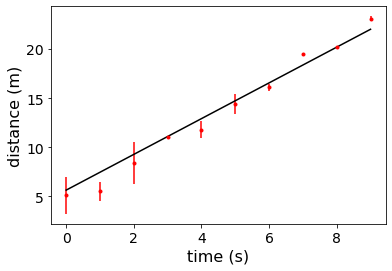

In [33]:
plt.errorbar(x,y, dy, marker = 'o', markersize = 3, c = 'red', linestyle = ' ')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.plot(x, bestb_werr + bestm_werr * x, c = 'black');

We can compare the two lines:

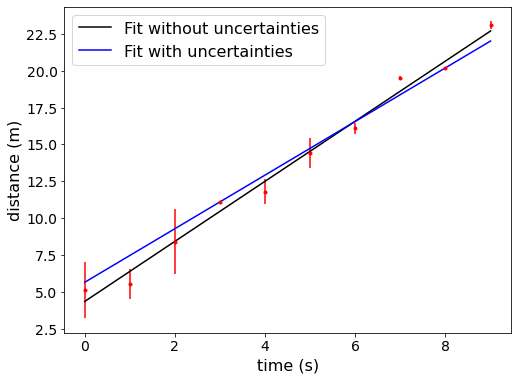

In [34]:
plt.figure(figsize=(8,6))

plt.errorbar(x,y, dy, marker = 'o', markersize = 3, c = 'red', linestyle = ' ')

plt.plot(x, bestb + bestm * x, c = 'black', label = 'Fit without uncertainties')

plt.plot(x, bestb_werr + bestm_werr * x, c = 'b', label = 'Fit with uncertainties')

plt.xlabel('time (s)')

plt.ylabel('distance (m)')

plt.legend();


Does the change make sense?